In [1]:
# Import of the data 
# This can take a while 

import pyspark.sql.types as T
import pyspark.sql.functions as F
from pyspark.sql import Window

DAU_SCHEMA = T.StructType([
    T.StructField('userId', T.StringType()),
    T.StructField('createdAt', T.StringType()),
    T.StructField(
        'data', T.StructType([
            T.StructField('activity-title', T.StringType()),
        ]),
    ),
])

PATH = "s3a://alpha-health-pro/red/evermind/events/2020/*/*/*/*"
evermindDF_raw = spark.read.schema(schema=DAU_SCHEMA).json(PATH)
evermindDF_raw.count()

617053

In [2]:
df = evermindDF_raw\
    .withColumn("date", F.date_format(F.to_timestamp(F.col("createdAt")), "yyyy-MM-dd"))\
    .toPandas()

/Users/yc00123/.virtualenvs/py3.6.8-data-access/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
df.dropna(subset = ['data'], inplace=True)

In [4]:
import pandas as pd
def get_data(x):
    return x[0]

df['activity'] = df['data'].apply(lambda x: get_data(x))

In [5]:
import datetime as dt
df['createdAt']= pd.to_datetime(df['createdAt'], utc=True) 
df['hour'] = df['createdAt'].dt.hour

In [6]:
# Categorisation of the hours of the day
def get_hour_categories(x):
    if x<=10 :
        return '0-10'
    elif 10 < x <= 13:
        return '10-13'
    elif 13 < x <= 16:
        return '13-16'
    elif 16 < x <= 19:
        return '16-19'
    elif 19 < x <= 22:
        return '19-22'
    elif x > 22:
        return 'after 22'

df['hour_cat'] = df['hour'].apply(lambda x: get_hour_categories(x))

In [7]:
df2 = df.groupby(['hour_cat', 'activity'])
df2 = df2['activity'].count().reset_index(name="count")
df2.head()

,hour_cat,activity,count
0,0-10,Achievements,27
1,0-10,Autogenic training for sleep,483
2,0-10,Automatic thoughts and self-confidence,225
3,0-10,Balance your thoughts,197
4,0-10,Balancing thoughts,170


In [8]:
df2.sort_values(by=['hour_cat','count'], ascending=[True, False])

,hour_cat,activity,count
16,0-10,Echo,19060
30,0-10,Keeping a thought record,9958
15,0-10,Dominating doubt and uncertainty,4122
48,0-10,Recognising unhelpful thoughts,2080
5,0-10,Beginner's progressive muscle relaxation,2022
...,...,...,...
423,after 22,Creating balanced thoughts,8
416,after 22,Balance your thoughts,6
437,after 22,Identifying your bad sleep habits,6
486,after 22,Your cosy place,5


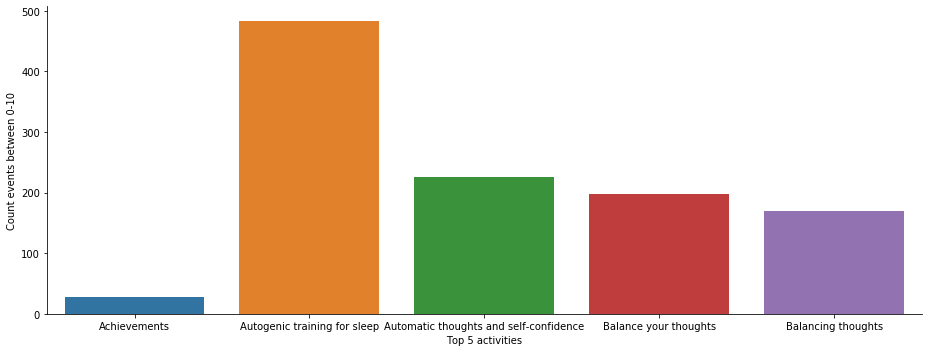

In [13]:
import seaborn as sns
import matplotlib as plt
a = df2[df2['hour_cat']=='0-10'][:5]
fig = sns.catplot(x="activity", y="count", kind="bar", data =a, aspect=2.6)
fig.set_axis_labels('Top 5 activities', 'Count events between 0-10')

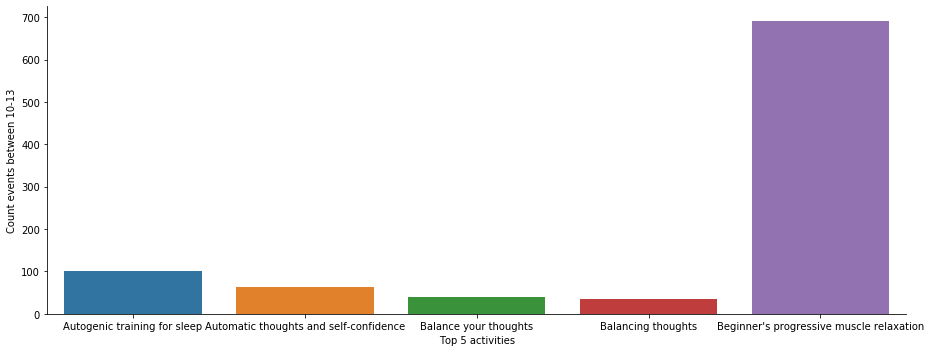

In [15]:
b = df2[df2['hour_cat']=='10-13'][:5]
fig = sns.catplot(x="activity", y="count", kind="bar", data =b, aspect=2.6)
fig.set_axis_labels('Top 5 activities', 'Count events between 10-13')

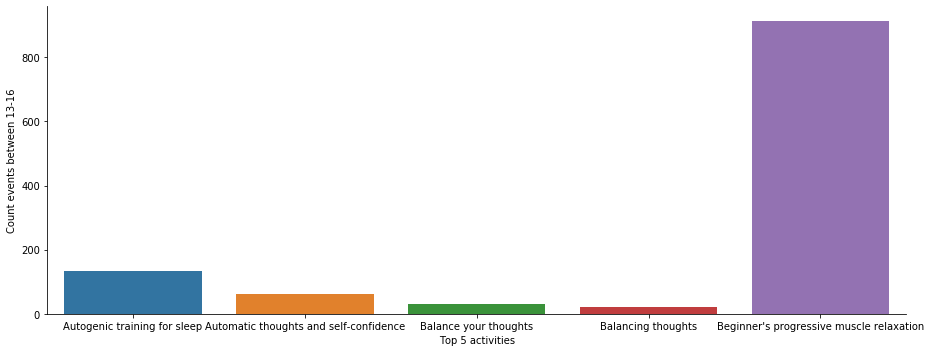

In [16]:
c = df2[df2['hour_cat']=='13-16'][:5]
fig = sns.catplot(x="activity", y="count", kind="bar", data =c, aspect=2.6)
fig.set_axis_labels('Top 5 activities', 'Count events between 13-16')

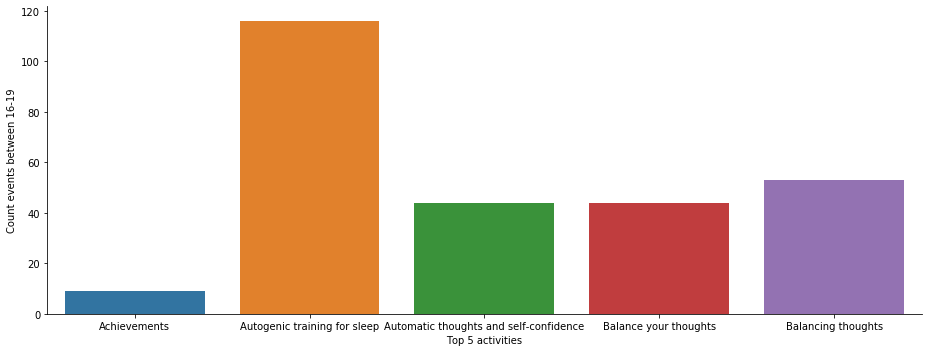

In [17]:
d = df2[df2['hour_cat']=='16-19'][:5]
fig = sns.catplot(x="activity", y="count", kind="bar", data =d, aspect=2.6)
fig.set_axis_labels('Top 5 activities', 'Count events between 16-19')

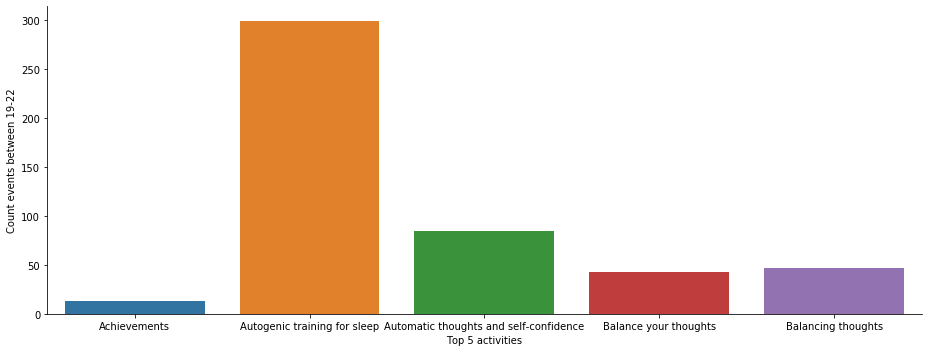

In [18]:
e = df2[df2['hour_cat']=='19-22'][:5]
fig = sns.catplot(x="activity", y="count", kind="bar", data =e, aspect=2.6)
fig.set_axis_labels('Top 5 activities', 'Count events between 19-22')

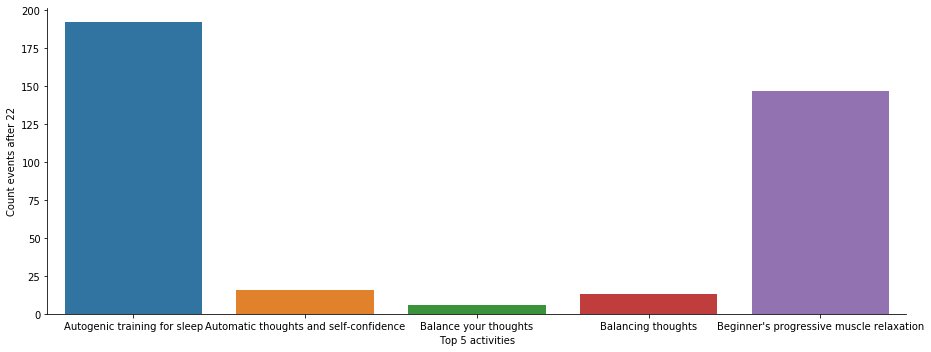

In [19]:
f = df2[df2['hour_cat']=='after 22'][:5]
fig = sns.catplot(x="activity", y="count", kind="bar", data =f, aspect=2.6)
fig.set_axis_labels('Top 5 activities', 'Count events after 22')